In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

train = pd.read_csv("data/clean_train.csv", index_col=0)
test = pd.read_csv("data/clean_test.csv", index_col=0)

train.head()

/Users/canivel/virtualenvs/kaggle/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [2]:
# How is var38 looking when customer is unhappy ?
train.loc[train['TARGET']==1, 'var38'].describe()

count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

In [3]:
# How is var38 looking when customer is happy ?
train.loc[train['TARGET']==0, 'var38'].describe()

count    7.301200e+04
mean     1.179592e+05
std      1.851009e+05
min      5.163750e+03
25%      6.843274e+04
50%      1.072078e+05
75%      1.197423e+05
max      2.203474e+07
Name: var38, dtype: float64

In [4]:
#most common values for var38 ?
train.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
236690.340000        8
104644.410000        7
125722.440000        7
128318.520000        7
329603.970000        7
67088.310000         7
70813.800000         6
97639.560000         6
163432.470000        6
100466.730000        6
168733.620000        6
185385.690000        6
105260.880000        6
208961.790000        5
121603.020000        5
53324.460000         5
131353.470000        5
71302.530000         5
126065.040000        5
192920.760000        5
185784.720000        5
229351.650000        5
33184.020000         5
63820.890000         5
276030.570000        5
                 ...  
60641.190000         1
116348.850000        1
260050.500000        1
138685.650000        1
259491.210000        1
38497.500000         1
169253.910000        1
53706.630000         1
124985.760000        1
122917.860000        1
63206.880000         1
119542.260000        1
144531.9900

In [5]:
train.loc[(train['TARGET']==1) & (train.var38 >= 117310) & (train.var38 <= 117311)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.0,614.0,614.000000,...,614.0,614.0,614.0,614.0,614.0,614.0,614.0,614.0,6.140000e+02,614.0
mean,-3255.063518,40.037459,26.971661,102.011580,134.115293,5.061352,5.554837,0.0,0.0,5.489951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05,1.0
std,57026.515925,12.540449,223.427831,663.167072,743.601404,110.985554,123.105774,0.0,0.0,121.510911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.456378e-11,0.0
min,-999999.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05,1.0
25%,2.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05,1.0
50%,2.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05,1.0
75%,2.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05,1.0
max,114.000000,102.000000,3780.000000,12888.030000,13183.230000,2723.820000,3026.820000,0.0,0.0,2986.980000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.173110e+05,1.0


In [6]:
#remove the 117310
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts()

451931.22    16
463625.16    12
288997.44    11
104563.80    11
236690.34     8
125722.44     7
67088.31      7
329603.97     7
128318.52     7
104644.41     7
168733.62     6
105260.88     6
70813.80      6
185385.69     6
100466.73     6
97639.56      6
163432.47     6
85814.04      5
227397.72     5
185784.72     5
53324.46      5
63820.89      5
121603.02     5
235476.72     5
276030.57     5
229351.65     5
71302.53      5
148781.16     5
127141.50     5
83174.28      5
             ..
78575.76      1
92559.15      1
213357.09     1
86544.00      1
69771.57      1
93040.41      1
101787.87     1
29253.36      1
78572.79      1
117020.22     1
163871.28     1
135987.99     1
42972.66      1
98882.58      1
86197.11      1
88632.51      1
147800.49     1
34231.14      1
57845.01      1
118496.31     1
76820.16      1
48498.87      1
34952.10      1
203976.78     1
177303.66     1
115873.29     1
194914.29     1
26466.60      1
58412.37      1
19546.50      1
Name: var38, dtype: int6

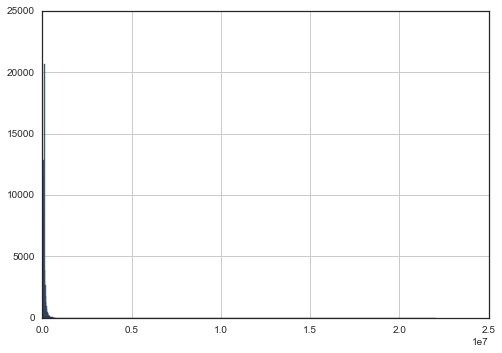

In [7]:
train.var38.hist(bins=1000)

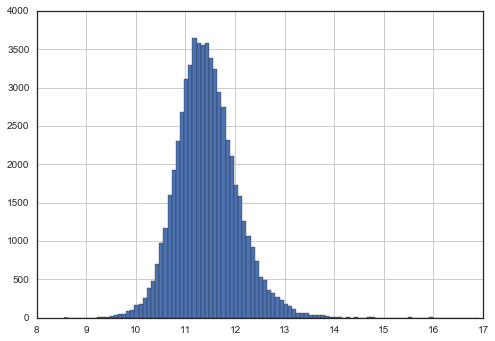

In [8]:
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100)

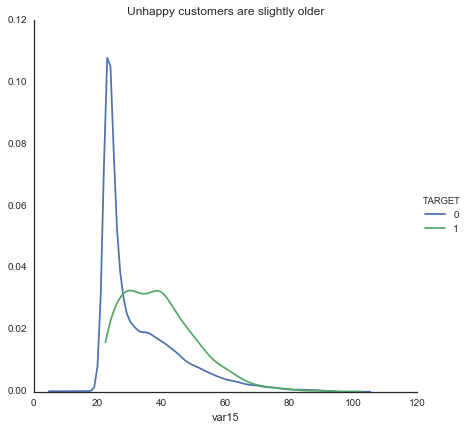

In [9]:
# Let's look at the density of the age of happy/unhappy customers
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Unhappy customers are slightly older')
plt.show()


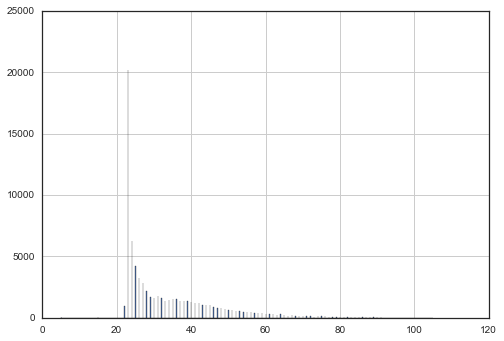

In [10]:
train.var15.hist(bins=1000)

In [11]:
train.loc[train['TARGET']==0, 'var15'].describe()

count    73012.000000
mean        32.946406
std         12.924444
min          5.000000
25%         23.000000
50%         27.000000
75%         39.000000
max        105.000000
Name: var15, dtype: float64

In [12]:
train.loc[train['TARGET']==1, 'var15'].describe()

count    3008.000000
mean       39.680519
std        12.020518
min        23.000000
25%        30.000000
50%        38.000000
75%        47.000000
max       102.000000
Name: var15, dtype: float64

In [13]:
train.var15.value_counts()

23     20170
24      6232
25      4217
26      3270
27      2861
28      2173
31      1798
29      1727
30      1640
32      1592
36      1546
35      1536
34      1489
37      1401
38      1390
33      1377
39      1329
40      1310
41      1242
42      1199
43      1077
44      1042
45      1020
22       940
46       910
47       780
48       773
49       708
50       666
51       663
       ...  
15        27
90        26
21        21
6         21
93        20
14        20
11        19
9         18
10        17
92        16
19        16
18        14
17        13
16        12
94        12
13        11
12        11
20         9
8          9
96         7
7          6
95         6
99         6
100        6
102        4
97         3
104        2
98         1
105        1
101        1
Name: var15, dtype: int64

In [14]:
train.var36.value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

In [15]:
train.loc[(train['TARGET']==1) & (train.var36 == 99)].count()

var3                             1938
var15                            1938
imp_ent_var16_ult1               1938
imp_op_var39_comer_ult1          1938
imp_op_var39_comer_ult3          1938
imp_op_var40_comer_ult1          1938
imp_op_var40_comer_ult3          1938
imp_op_var40_efect_ult1          1938
imp_op_var40_efect_ult3          1938
imp_op_var40_ult1                1938
imp_op_var41_comer_ult1          1938
imp_op_var41_comer_ult3          1938
imp_op_var41_efect_ult1          1938
imp_op_var41_efect_ult3          1938
imp_op_var41_ult1                1938
imp_op_var39_efect_ult1          1938
imp_op_var39_efect_ult3          1938
imp_op_var39_ult1                1938
imp_sal_var16_ult1               1938
ind_var1_0                       1938
ind_var1                         1938
ind_var5_0                       1938
ind_var5                         1938
ind_var6_0                       1938
ind_var6                         1938
ind_var8_0                       1938
ind_var8    

In [16]:
train.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [17]:
train.loc[(train['TARGET']==1) & (train.var38 <= train.var38.mean()) & (train.var36 == 99)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,1261.000000,1261.000000,1261.0,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.0,...,1261.0,1261.0,1261.0,1261.0,1261.0,1261.0,1261.0,1261.0,1261.000000,1261.0
mean,2.111816,39.356860,0.0,4.265258,5.675496,0.178620,0.178620,1.356067,1.356067,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65125.022355,1.0
std,3.954025,11.577599,0.0,59.423742,75.342060,6.342902,6.342902,48.154687,48.154687,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23976.579989,0.0
min,0.000000,23.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11136.630000,1.0
25%,2.000000,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46588.500000,1.0
50%,2.000000,38.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63436.470000,1.0
75%,2.000000,46.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82395.420000,1.0
max,142.000000,85.000000,0.0,1317.240000,1902.240000,225.240000,225.240000,1710.000000,1710.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117184.290000,1.0


In [18]:
train['var36_mod'] = 0
train['var36_mod'].loc[(train.var38 >= 117310) & (train.var38 <= 117311) & (train.var36 == 99)] = 1
train['var36_mod'].loc[(train.var38 <= train.var38.mean()) & (train.var36 == 99)] = 1

In [19]:
train.loc[(train['TARGET']==1) & (train.saldo_medio_var5_ult3 <= train.saldo_medio_var5_ult3.mean())].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod
count,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,...,2909.0,2909.0,2909.0,2909.0,2909.0,2909.000000,2909.000000,2.909000e+03,2909.0,2909.000000
mean,-685.372637,39.448608,37.824421,69.082987,100.098893,2.848938,3.763530,3.114472,3.991062,3.529326,...,0.0,0.0,0.0,0.0,0.0,2.883774,2.883774,9.801471e+04,1.0,0.574768
std,26216.152512,11.889877,369.968039,386.975315,474.154145,54.542724,64.812663,61.995648,82.051926,66.370330,...,0.0,0.0,0.0,0.0,0.0,155.536799,155.536799,7.957652e+04,0.0,0.494463
min,-999999.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.113663e+04,1.0,0.000000
25%,2.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.662161e+04,1.0,0.000000
50%,2.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,8.572383e+04,1.0,1.000000
75%,2.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.173110e+05,1.0,1.000000
max,142.000000,102.000000,15000.000000,12888.030000,13183.230000,2068.500000,2068.500000,1800.000000,3000.000000,1974.000000,...,0.0,0.0,0.0,0.0,0.0,8388.900000,8388.900000,1.930667e+06,1.0,1.000000


In [20]:
train['saldo_medio_low'] = 0
train['saldo_medio_low'].loc[(train.saldo_medio_var5_ult3 <= train.saldo_medio_var5_ult3.mean())] = 1

In [21]:
train.loc[(train['TARGET']==1) & (train.saldo_medio_low == 1)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low
count,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,2909.000000,...,2909.0,2909.0,2909.0,2909.0,2909.000000,2909.000000,2.909000e+03,2909.0,2909.000000,2909.0
mean,-685.372637,39.448608,37.824421,69.082987,100.098893,2.848938,3.763530,3.114472,3.991062,3.529326,...,0.0,0.0,0.0,0.0,2.883774,2.883774,9.801471e+04,1.0,0.574768,1.0
std,26216.152512,11.889877,369.968039,386.975315,474.154145,54.542724,64.812663,61.995648,82.051926,66.370330,...,0.0,0.0,0.0,0.0,155.536799,155.536799,7.957652e+04,0.0,0.494463,0.0
min,-999999.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.113663e+04,1.0,0.000000,1.0
25%,2.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,5.662161e+04,1.0,0.000000,1.0
50%,2.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,8.572383e+04,1.0,1.000000,1.0
75%,2.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,1.173110e+05,1.0,1.000000,1.0
max,142.000000,102.000000,15000.000000,12888.030000,13183.230000,2068.500000,2068.500000,1800.000000,3000.000000,1974.000000,...,0.0,0.0,0.0,0.0,8388.900000,8388.900000,1.930667e+06,1.0,1.000000,1.0


In [22]:
train.loc[(train['TARGET']==0) & (train.saldo_medio_low == 0)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low
count,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,...,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7113.000000,7.113000e+03,7113.0,7113.000000,7113.0
mean,-840.357936,45.094053,424.640772,252.635922,410.204673,12.581518,19.057992,1.125812,1.125812,15.083361,...,27.220822,18.541434,243.382944,13.340291,508.255226,352.776040,1.277647e+05,0.0,0.022635,0.0
std,29033.372210,14.017345,3392.348309,639.164449,996.450367,182.272893,268.895997,78.639399,78.639399,233.121558,...,1060.364008,710.103740,5980.058166,409.861577,10708.188448,6475.619731,3.149513e+05,0.0,0.148746,0.0
min,-999999.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.052847e+04,0.0,0.000000,0.0
25%,2.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.565484e+04,0.0,0.000000,0.0
50%,2.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.173110e+05,0.0,0.000000,0.0
75%,2.000000,52.000000,0.000000,150.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.328687e+05,0.0,0.000000,0.0
max,229.000000,104.000000,129300.000000,8675.700000,14121.360000,7904.220000,10351.950000,6600.000000,6600.000000,7904.220000,...,51979.110000,40207.530000,438329.220000,24650.010000,681462.900000,374947.530000,2.203474e+07,0.0,1.000000,0.0


In [23]:
train['var38mc'] = np.isclose(train.var38, 117310.979016)
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

In [24]:
train.var38mc.value_counts()

False    61151
True     14869
Name: var38mc, dtype: int64

In [25]:
train.logvar38.value_counts()

0.000000     14869
13.021285       16
13.046832       12
12.574173       11
11.557553       11
12.374508        8
12.705647        7
11.741832        7
11.762271        7
11.558323        7
11.113765        7
12.004155        6
11.564197        6
12.130194        6
11.489038        6
11.167809        6
11.517582        6
12.036077        6
11.440760        5
11.785647        5
11.708517        5
12.528267        5
11.744553        5
12.369367        5
11.753056        5
12.170035        5
10.409824        5
11.359938        5
12.249907        5
11.910232        5
             ...  
10.943756        1
11.604137        1
11.249520        1
10.685539        1
12.326905        1
10.714794        1
11.515824        1
10.845677        1
12.605878        1
11.272541        1
11.214337        1
10.715878        1
10.700303        1
12.452446        1
11.674218        1
11.848256        1
11.693120        1
11.471364        1
11.922481        1
12.590706        1
10.354943        1
11.442170   

In [26]:
train.logvar38.value_counts()

0.000000     14869
13.021285       16
13.046832       12
12.574173       11
11.557553       11
12.374508        8
12.705647        7
11.741832        7
11.762271        7
11.558323        7
11.113765        7
12.004155        6
11.564197        6
12.130194        6
11.489038        6
11.167809        6
11.517582        6
12.036077        6
11.440760        5
11.785647        5
11.708517        5
12.528267        5
11.744553        5
12.369367        5
11.753056        5
12.170035        5
10.409824        5
11.359938        5
12.249907        5
11.910232        5
             ...  
10.943756        1
11.604137        1
11.249520        1
10.685539        1
12.326905        1
10.714794        1
11.515824        1
10.845677        1
12.605878        1
11.272541        1
11.214337        1
10.715878        1
10.700303        1
12.452446        1
11.674218        1
11.848256        1
11.693120        1
11.471364        1
11.922481        1
12.590706        1
10.354943        1
11.442170   

In [27]:
train.saldo_medio_low.value_counts()

1    68808
0     7212
Name: saldo_medio_low, dtype: int64

In [28]:
train.saldo_medio_var5_ult3.mean()

1048.8564471191792

In [29]:
train['saldo_medio'] = 0
train['saldo_medio'] = train[["saldo_var30",
                           "saldo_var42",
                           "saldo_var5",
                           "saldo_medio_var5_hace2",
                           "saldo_medio_var5_hace3",
                           "saldo_medio_var5_ult3",
                           "saldo_medio_var5_ult1"]].sum(axis=1)
saldo_medio_var = train[["saldo_var30",
                           "saldo_var42",
                           "saldo_var5",
                           "saldo_medio_var5_hace2",
                           "saldo_medio_var5_hace3",
                           "saldo_medio_var5_ult3",
                           "saldo_medio_var5_ult1"]].mean().sum()

In [30]:
saldo_medio_var

26496.481666535034

In [31]:
train.loc[(train['TARGET']==1) & (train.saldo_medio <= saldo_medio_var)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio
count,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,2935.000000,...,2935.0,2935.0,2935.0,2935.0,2.935000e+03,2935.0,2935.000000,2935.000000,2935.000000,2935.000000
mean,-679.246337,39.450426,42.640518,80.501816,116.586562,4.063860,4.945513,3.393526,4.262351,3.498061,...,0.0,0.0,0.0,0.0,9.796644e+04,1.0,0.570017,0.981261,8.925290,636.732337
std,26099.815760,11.873833,427.195965,437.114862,537.941721,86.346008,93.095555,63.902833,83.345966,66.076429,...,0.0,0.0,0.0,0.0,7.908895e+04,0.0,0.495158,0.135626,4.570132,2508.033857
min,-999999.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.113663e+04,1.0,0.000000,0.000000,0.000000,-5625.990000
25%,2.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,5.674809e+04,1.0,0.000000,1.000000,10.385784,0.000000
50%,2.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,8.581404e+04,1.0,1.000000,1.000000,11.024729,0.000000
75%,2.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.173110e+05,1.0,1.000000,1.000000,11.444496,57.600000
max,142.000000,102.000000,18495.000000,12888.030000,13183.230000,3639.870000,3639.870000,1800.000000,3000.000000,1974.000000,...,0.0,0.0,0.0,0.0,1.930667e+06,1.0,1.000000,1.000000,14.473376,25805.580000


In [32]:
train['n0'] = (train == 0).sum(axis=1)
train['saldo_medio_low'] = 0
train['saldo_medio_low'].loc[(train.saldo_medio <= saldo_medio_var/train.logvar38)] = 1

In [33]:
train.loc[(train['TARGET']==1) & (train.saldo_medio_low == 1)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio,n0
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.00000,2783.000000,...,2783.0,2783.0,2783.0,2.783000e+03,2783.0,2783.000000,2783.0,2783.000000,2783.000000,2783.000000
mean,-716.463169,39.293927,23.285918,55.209637,81.210604,3.587679,4.322296,2.824290,3.63277,3.863489,...,0.0,0.0,0.0,9.704686e+04,1.0,0.599713,1.0,8.743831,775.216073,283.482573
std,26802.842018,11.933189,196.055306,372.956132,447.733230,73.994393,83.945294,59.178419,80.56632,83.048972,...,0.0,0.0,0.0,7.674047e+04,0.0,0.490045,0.0,4.681947,15189.322913,17.527271
min,-999999.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,1.113663e+04,1.0,0.000000,1.0,0.000000,-5625.990000,202.000000
25%,2.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,5.661832e+04,1.0,0.000000,1.0,10.254435,0.000000,277.000000
50%,2.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,8.593542e+04,1.0,1.000000,1.0,10.999632,0.000000,292.000000
75%,2.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.0,1.173110e+05,1.0,1.000000,1.0,11.418423,20.400000,294.000000
max,142.000000,102.000000,3780.000000,12888.030000,13183.230000,2723.820000,3026.820000,1800.000000,3000.00000,2986.980000,...,0.0,0.0,0.0,1.930667e+06,1.0,1.000000,1.0,14.473376,684256.110000,300.000000


In [34]:
train.saldo_medio_low.value_counts()

1    62128
0    13892
Name: saldo_medio_low, dtype: int64

In [35]:
train.TARGET.value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [36]:
train.loc[(train['TARGET']==1) & (train.var15 >= 30)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio,n0
count,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,2337.000000,...,2337.0,2337.000000,2337.000000,2.337000e+03,2337.0,2337.000000,2337.000000,2337.000000,2.337000e+03,2337.000000
mean,-425.621309,43.629012,104.710295,107.270270,153.362824,6.423723,7.982259,4.261874,5.353017,5.933312,...,0.0,18.336175,18.336175,9.772799e+04,1.0,0.559692,0.908002,8.901291,6.180031e+03,279.952503
std,20685.747142,10.712769,1571.927130,516.099817,635.674386,112.140548,123.447953,71.590755,93.375471,97.179393,...,0.0,733.630829,733.630829,1.025517e+05,0.0,0.496530,0.289085,4.585740,4.705600e+04,20.746902
min,-999999.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.113663e+04,1.0,0.000000,0.000000,0.000000,-5.625990e+03,197.000000
25%,2.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.788194e+04,1.0,0.000000,1.000000,10.339216,0.000000e+00,270.000000
50%,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,8.699787e+04,1.0,1.000000,1.000000,11.038543,0.000000e+00,292.000000
75%,2.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.173110e+05,1.0,1.000000,1.000000,11.447631,1.669500e+02,294.000000
max,142.000000,102.000000,51003.000000,12888.030000,13183.230000,3639.870000,3639.870000,1800.000000,3000.000000,2986.980000,...,0.0,34462.740000,34462.740000,3.988595e+06,1.0,1.000000,1.000000,15.198950,1.013012e+06,300.000000


In [44]:
train.loc[(train['TARGET']==0) & (train.var15 >= 23) & (train.var15 <= 50)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio,n0
count,63990.000000,63990.000000,63990.00000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,63990.000000,...,63990.000000,63990.000000,63990.000000,6.399000e+04,63990.0,63990.000000,63990.000000,63990.000000,6.399000e+04,63990.000000
mean,-1560.408158,29.646601,69.73909,70.400344,115.708006,2.414649,4.330314,0.308017,0.438474,2.179481,...,1.404698,40.654472,31.021788,1.167717e+05,0.0,0.289061,0.842991,9.213124,1.673132e+04,276.170714
std,39501.020262,7.786964,1074.81123,321.718002,515.862684,72.562319,122.596582,30.232403,35.161222,74.016530,...,135.916380,2553.588501,2053.679162,1.824111e+05,0.0,0.453330,0.363812,4.554244,8.794878e+04,16.881686
min,-999999.000000,23.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.163750e+03,0.0,0.000000,0.000000,0.000000,-9.884520e+03,167.000000
25%,2.000000,23.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.760837e+04,0.0,0.000000,1.000000,10.608230,1.770000e+00,268.000000
50%,2.000000,26.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.053883e+05,0.0,0.000000,1.000000,11.219046,2.040000e+01,279.000000
75%,2.000000,35.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.178710e+05,0.0,1.000000,1.000000,11.677346,8.603100e+02,286.000000
max,225.000000,50.000000,129300.00000,9946.710000,14121.360000,6300.690000,11073.570000,6600.000000,6600.000000,6848.340000,...,24650.010000,397884.300000,397884.300000,2.203474e+07,0.0,1.000000,1.000000,16.908131,4.942008e+06,301.000000


In [45]:
train.var36.value_counts()

99    30064
3     22177
1     14664
2      8704
0       411
Name: var36, dtype: int64

In [46]:
train.loc[(train['TARGET']==1) & (train.var36 == 0)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio,n0
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
train.loc[(train['TARGET']==1) & (train.var36 == 2)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio,n0
count,241.000000,241.000000,241.0,241.000000,241.000000,241.0,241.000000,241.0,241.0,241.0,...,241.0,241.0,241.0,2.410000e+02,241.0,241.0,241.000000,241.000000,2.410000e+02,241.000000
mean,2.327801,42.618257,0.0,108.323776,206.310871,0.0,0.302490,0.0,0.0,0.0,...,0.0,0.0,0.0,1.010021e+05,1.0,0.0,0.809129,9.337605,2.245366e+04,265.539419
std,1.813266,11.864316,0.0,355.652653,567.212652,0.0,4.695902,0.0,0.0,0.0,...,0.0,0.0,0.0,8.062888e+04,0.0,0.0,0.393806,4.327944,9.141072e+04,14.321877
min,1.000000,23.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.411383e+04,1.0,0.0,0.000000,0.000000,-2.220240e+03,225.000000
25%,2.000000,34.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,5.926941e+04,1.0,0.0,1.000000,10.659931,4.785000e+01,256.000000
50%,2.000000,41.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,9.317058e+04,1.0,0.0,1.000000,11.120632,2.796000e+02,268.000000
75%,2.000000,49.000000,0.0,0.000000,80.430000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.173110e+05,1.0,0.0,1.000000,11.561480,2.279430e+03,277.000000
max,15.000000,89.000000,0.0,2720.280000,4930.470000,0.0,72.900000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.019558e+06,1.0,0.0,1.000000,13.834880,1.013012e+06,290.000000


In [48]:
train.loc[(train['TARGET']==1) & (train.var36 == 1)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio,n0
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,...,461.0,461.000000,461.000000,4.610000e+02,461.0,461.0,461.000000,461.000000,461.000000,461.000000
mean,2.698482,42.403471,561.597918,481.170586,664.744555,24.200824,31.943557,14.381779,19.913232,26.104555,...,0.0,92.953666,92.953666,1.094905e+05,1.0,0.0,0.659436,9.601299,16402.693080,248.937093
std,7.527210,11.102385,3518.474086,1059.536327,1251.759392,227.895573,255.208155,130.310239,187.333674,209.278936,...,0.0,1651.133257,1651.133257,1.924791e+05,0.0,0.0,0.474414,4.106485,72842.267171,15.809132
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.250946e+04,1.0,0.0,0.000000,0.000000,-5625.990000,197.000000
25%,2.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.959572e+04,1.0,0.0,0.000000,10.641847,213.240000,238.000000
50%,2.000000,41.000000,0.000000,38.190000,119.340000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,8.823402e+04,1.0,0.0,1.000000,11.150397,1149.600000,248.000000
75%,2.000000,48.000000,138.000000,512.430000,821.610000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.173110e+05,1.0,0.0,1.000000,11.617208,5483.700000,260.000000
max,116.000000,93.000000,51003.000000,12888.030000,13183.230000,3639.870000,3639.870000,1800.000000,3000.000000,2986.980000,...,0.0,34462.740000,34462.740000,3.988595e+06,1.0,0.0,1.000000,15.198950,866534.580000,285.000000


In [49]:
train.loc[(train['TARGET']==1) & (train.var36 == 3)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio,n0
count,368.000000,368.000000,368.0,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.0,368.0,368.0,3.680000e+02,368.0,368.0,368.000000,368.000000,368.000000,368.000000
mean,-5432.404891,35.994565,0.0,36.589728,55.285679,9.865272,9.865272,4.402174,4.402174,4.978125,...,0.0,0.0,0.0,1.070093e+05,1.0,0.0,0.956522,8.569327,4219.942908,273.755435
std,73620.574472,12.371628,0.0,221.645410,283.934402,119.325089,119.325089,56.637585,56.637585,67.514713,...,0.0,0.0,0.0,9.231367e+04,0.0,0.0,0.204209,4.877500,39247.257737,11.181435
min,-999999.000000,23.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,2.029050e+04,1.0,0.0,0.000000,0.000000,-609.720000,211.000000
25%,2.000000,27.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,5.856903e+04,1.0,0.0,1.000000,10.173419,18.150000,273.000000
50%,2.000000,31.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,9.326532e+04,1.0,0.0,1.000000,10.986950,19.800000,279.000000
75%,2.000000,42.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.173110e+05,1.0,0.0,1.000000,11.454059,165.930000,279.000000
max,111.000000,88.000000,0.0,2896.320000,3221.880000,2068.500000,2068.500000,900.000000,900.000000,960.540000,...,0.0,0.0,0.0,1.005741e+06,1.0,0.0,1.000000,13.821235,616970.310000,286.000000


In [50]:
train.loc[(train['TARGET']==1) & (train.var36 == 99)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio,n0
count,1938.000000,1938.000000,1938.0,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000,1938.0,...,1938.0,1938.0,1938.0,1.938000e+03,1938.0,1938.000000,1938.000000,1938.000000,1938.000000,1938.000000
mean,2.069143,39.367389,0.0,4.302368,5.935341,0.116223,0.116223,0.882353,0.882353,0.0,...,0.0,0.0,0.0,9.578753e+04,1.0,0.863777,0.996904,8.812022,80.677523,291.952528
std,3.190455,11.961615,0.0,62.181254,81.490164,5.116449,5.116449,38.843578,38.843578,0.0,...,0.0,0.0,0.0,7.923421e+04,0.0,0.343114,0.055570,4.617387,1229.144865,8.581404
min,0.000000,23.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.113663e+04,1.0,0.000000,0.000000,0.000000,-1596.960000,219.000000
25%,2.000000,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,5.606935e+04,1.0,1.000000,1.000000,10.270490,0.000000,292.000000
50%,2.000000,38.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,8.342607e+04,1.0,1.000000,1.000000,10.997996,0.000000,294.000000
75%,2.000000,46.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.173110e+05,1.0,1.000000,1.000000,11.400339,0.000000,295.000000
max,142.000000,102.000000,0.0,1520.190000,2147.730000,225.240000,225.240000,1710.000000,1710.000000,0.0,...,0.0,0.0,0.0,1.930667e+06,1.0,1.000000,1.000000,14.473376,43836.210000,300.000000


In [65]:
train.loc[(train['TARGET']==1) & (train.var15 >= 23) & (train.var15 <= 50) & (train.var36 >= 1)].describe()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET,var36_mod,saldo_medio_low,logvar38,saldo_medio,n0
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,...,169.0,169.000000,169.000000,1.690000e+02,169.0,169.000000,169.0,169.000000,1.690000e+02,169.000000
mean,2.857988,38.952663,709.687633,592.353728,845.560651,8.212189,17.666982,7.100592,8.875740,18.426391,...,0.0,49.638462,49.638462,1.373438e+05,1.0,0.023669,0.0,11.418789,5.073882e+04,249.213018
std,8.865594,6.294187,4219.931338,1008.755594,1330.579893,75.000492,128.880475,92.307692,95.015237,130.391528,...,0.0,645.300000,645.300000,3.184510e+05,0.0,0.152466,0.0,0.726327,1.434881e+05,15.724248
min,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.250946e+04,1.0,0.000000,0.0,9.434240,2.228220e+03,197.000000
25%,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.792418e+04,1.0,0.000000,0.0,10.966890,4.231140e+03,238.000000
50%,2.000000,39.000000,0.000000,144.750000,254.910000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,8.635893e+04,1.0,0.000000,0.0,11.366267,8.466270e+03,248.000000
75%,2.000000,44.000000,0.000000,813.840000,1161.630000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.271644e+05,1.0,0.000000,0.0,11.753236,2.127498e+04,260.000000
max,116.000000,50.000000,51003.000000,5910.720000,7835.850000,900.000000,1039.740000,1200.000000,1200.000000,1273.080000,...,0.0,8388.900000,8388.900000,3.988595e+06,1.0,1.000000,0.0,15.198950,1.013012e+06,280.000000
